In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [2]:
! pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 7.9 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('student_habits_performance.csv')

In [4]:
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [5]:
len(df)

1000

In [6]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [7]:
df.isna().mean().sort_values(ascending=False)

,0
parental_education_level,0.091
student_id,0.000
gender,0.000
age,0.000
social_media_hours,0.000
netflix_hours,0.000
part_time_job,0.000
study_hours_per_day,0.000
attendance_percentage,0.000
sleep_hours,0.000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [9]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [10]:
df.nunique()

,0
student_id,1000
age,8
gender,3
study_hours_per_day,78
social_media_hours,60
netflix_hours,51
part_time_job,2
attendance_percentage,320
sleep_hours,68
diet_quality,3


In [12]:
df['diet_quality'].value_counts(dropna=False)

,count
diet_quality,
Fair,437
Good,378
Poor,185


In [13]:
df['gender'].value_counts(dropna=False)

,count
gender,
Female,481
Male,477
Other,42


In [14]:
df['part_time_job'].value_counts(dropna=False)

,count
part_time_job,
No,785
Yes,215


Text(0.5, 0, 'Count')

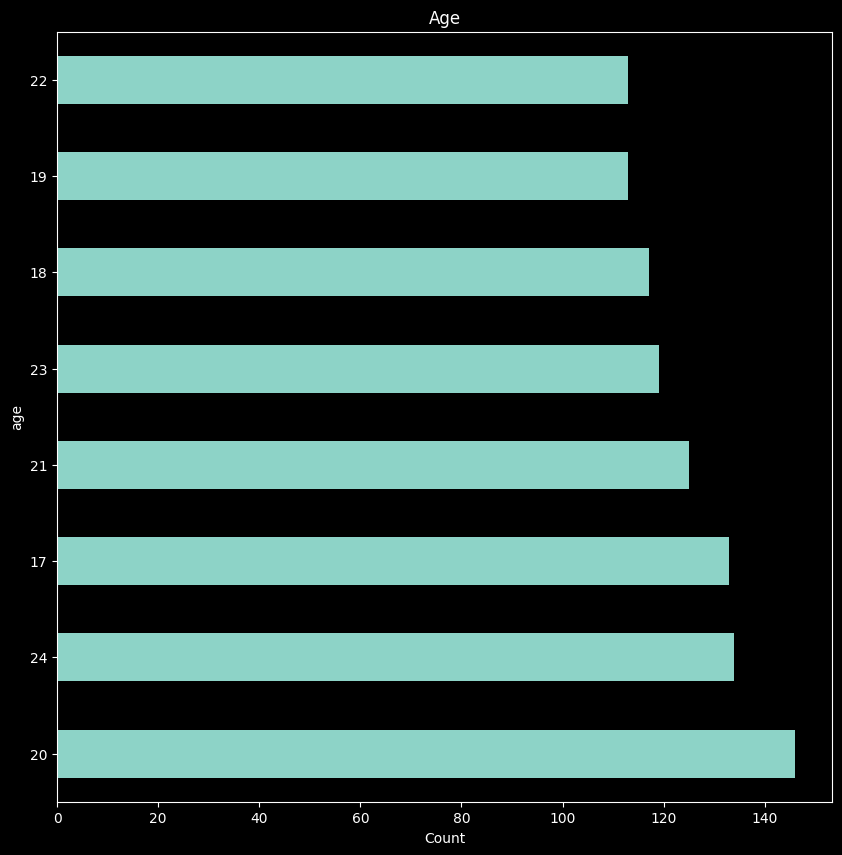

In [15]:
# Figure size
plt.figure(figsize=(10,10))

df['age'].value_counts().plot.barh()

# Aesthetics
plt.title('Age')
plt.xlabel('Count')

In [17]:
df[df['exam_score'] >= 90]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0
22,S1022,18,Other,4.9,2.3,0.6,No,84.5,6.0,Fair,3,High School,Average,7,No,98.7
49,S1049,22,Female,6.1,2.5,2.3,No,100.0,5.8,Poor,5,High School,Average,1,No,96.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0
951,S1951,20,Female,3.3,2.2,0.9,No,76.7,8.7,Good,5,Bachelor,Poor,10,No,94.0
960,S1960,17,Male,7.1,1.9,1.1,Yes,69.3,5.6,Good,6,High School,Average,6,No,100.0
972,S1972,17,Female,4.5,0.4,3.0,No,100.0,5.5,Fair,3,High School,Good,8,No,91.9


In [18]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


<Axes: >

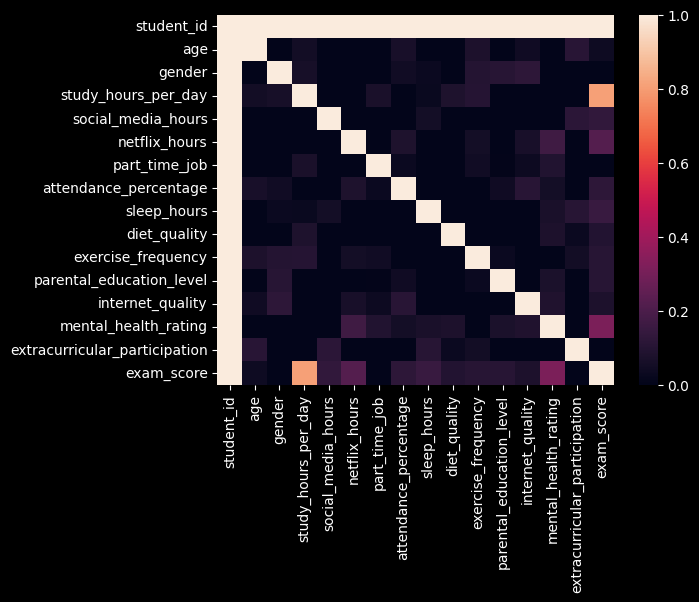

In [19]:
sns.heatmap(phik_overview)

In [20]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [25]:
model_mental_score = df.groupby('mental_health_rating')['exam_score'].agg(['count','mean'])

In [26]:
model_mental_score

,count,mean
mental_health_rating,,
1,102,62.370588
2,94,63.417021
3,105,64.475238
4,110,65.685455
5,99,66.769697
6,108,71.092593
7,91,74.273626
8,105,74.565714
9,87,76.889655


In [31]:
bins = [0, 1, 2, 3, 4, 5, 6, 8, 10]  # примерные границы
df['study_hours_bin'] = pd.cut(df['study_hours_per_day'], bins=bins)

In [32]:
model_study_score = df.groupby('study_hours_bin')['exam_score'].agg(['count','mean','median'])

<ipython-input-32-ffe8cc5ad0ad>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_study_score = df.groupby('study_hours_bin')['exam_score'].agg(['count','mean','median'])


In [33]:
model_study_score

,count,mean,median
study_hours_bin,,,
"(0, 1]",31,39.722581,39.00
"(1, 2]",110,49.745455,50.15
"(2, 3]",205,60.386829,60.60
"(3, 4]",276,70.101087,70.65
"(4, 5]",210,78.891905,78.45
"(5, 6]",111,88.029730,88.70
"(6, 8]",42,97.661905,100.00
"(8, 10]",2,100.000000,100.00


In [34]:
df.groupby('diet_quality')['exam_score'].agg(['count','mean','median'])

,count,mean,median
diet_quality,,,
Fair,437,70.428833,71.0
Good,378,69.366402,70.3
Poor,185,68.127568,67.4


In [35]:
df.groupby('netflix_hours')['exam_score'].agg(['count','mean','median'])

,count,mean,median
netflix_hours,,,
0.0,59,75.728814,77.90
0.1,12,72.708333,70.05
0.2,11,78.972727,83.30
0.3,17,75.370588,72.30
0.4,17,76.405882,72.90
0.5,21,73.028571,73.50
0.6,19,74.710526,74.30
0.7,28,68.842857,67.70
0.8,21,70.866667,75.10


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['median'].plot(kind='hist', bins=20, title='median')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['median'].plot(kind='line', figsize=(8, 4), title='median')
plt.gca().spines[['top', 'right']].set_visible(False)

Исходя из проведенного анализа данных можно сделать вывод:
1. Качество диеты не влияет на результат. Как и другие показатели в темной зоне на тепловой карте.
2. Влияет ментальное (психическое состояние) на результат, чем выше показатель ментального здоровья - тем выше оценки.
3. Небольшое влияние оказывают часы проведенные в netflix. Чем больше часов, тем снижается показатель оценок.
4. Самое сильное влияние оказываем показатель количества часов учебы, чем больше часов, тем выше бал оценки за экзамен.